# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Media,0.04,0.106,0.083,0.119,0.128,0.062
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068


In [3]:
rf=0.03

In [4]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:], index=annual_ret_summ.columns)
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

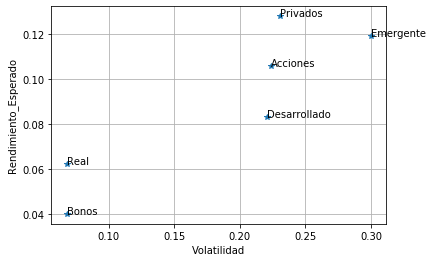

In [5]:
x_points =  annual_ret_summ.loc['Volatilidad']
y_points = annual_ret_summ.loc['Media']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(annual_ret_summ.loc['Volatilidad','Bonos'],
         annual_ret_summ.loc['Media','Bonos'], 'Bonos')
plt.text(annual_ret_summ.loc['Volatilidad','Acciones'],
         annual_ret_summ.loc['Media','Acciones'], 'Acciones')
plt.text(annual_ret_summ.loc['Volatilidad','Desarrollado'],
         annual_ret_summ.loc['Media','Desarrollado'], 'Desarrollado')
plt.text(annual_ret_summ.loc['Volatilidad','Emergente'],
         annual_ret_summ.loc['Media','Emergente'], 'Emergente')
plt.text(annual_ret_summ.loc['Volatilidad','Privados'],
         annual_ret_summ.loc['Media','Privados'], 'Privados')
plt.text(annual_ret_summ.loc['Volatilidad','Real'],
         annual_ret_summ.loc['Media','Real'], 'Real')
plt.grid()

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)

In [6]:
from scipy.optimize import minimize

In [7]:
## Construcción de parámetros
S = np.diag(annual_ret_summ.loc['Volatilidad'])
Sigma = S.dot(corr).dot(S)
Eind = annual_ret_summ.loc['Media'].values

In [8]:
# Función objetivo
def var(w, Sigma):
    return w.dot(Sigma).dot(w)

In [9]:
# Dato inicial
n = len(Eind)
w0 = np.ones((n,))/n
# Cotas de las variables
bnds = ((0,1),)*n
# Restricciones
cons = {'type':'eq','fun':lambda w: w.sum()-1}

In [10]:
# Portafolio de mínima varianza
minvar = minimize(fun=var,
                 x0=w0,
                 args=(Sigma,),
                 bounds=bnds,
                 constraints=cons)
minvar

     fun: 0.0027745037325952863
     jac: array([0.00551408, 0.00912289, 0.00525779, 0.00714968, 0.00710235,
       0.0055834 ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([4.95146500e-01, 0.00000000e+00, 2.09837058e-04, 4.33680869e-19,
       0.00000000e+00, 5.04643663e-01])

In [11]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_minvar = minvar.x
E_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(var(w_minvar, Sigma))
RS_minvar = (E_minvar - rf)/ s_minvar
w_minvar, E_minvar, s_minvar, RS_minvar

(array([4.95146500e-01, 0.00000000e+00, 2.09837058e-04, 4.33680869e-19,
        0.00000000e+00, 5.04643663e-01]),
 0.0511111835712562,
 0.0526735581918982,
 0.4007928132431225)

**Pesos aproximados portafolio de mínima varianza:**
Bonos= 49.515%
Acciones= 0%
Mercados desarrollados= 0.0209%
Mercados emergentes= 0%
Fondos privados= 0%
Activos reales= 50.464%

**Rendimiento esperado portafolio de mínima varianza=** 5.1111%

**Volatilidad portafolio de mínima varianza=** 5.2674%

**Cociente de Sharpe portafolio de mínima varianza=** 0.40079

In [12]:
# Función objetivo
def menos_RS(w,Eind,Sigma,rf):
    Ep = Eind.dot(w)
    sp = np.sqrt(w.dot(Sigma.dot(w)))
    RS = (Ep-rf)/sp
    return -RS

In [13]:
# Dato inicial
n = len(Eind)
w0 = np.ones((n,))/n
# Cotas de las variables
bnds = ((0,1),)*n
# Restricciones
cons = {'type':'eq','fun':lambda w: w.sum()-1}

In [14]:
# Portafolio EMV
EMV = minimize(fun=menos_RS,
               x0=w0,
               args=(Eind,Sigma,rf),
               bounds=bnds,
               constraints=cons)
EMV

     fun: -0.5811986201269803
     jac: array([-0.36522094, -0.28920723, -0.12258475, -0.36597762, -0.36617207,
       -0.36620118])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.94813386e-17, 6.13567686e-17, 1.09081620e-17, 8.19187949e-02,
       1.65859031e-01, 7.52222174e-01])

In [15]:
# Pesos, rendimiento y riesgo del portafolio EMV
w_EMV = EMV.x
E_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(var(w_EMV, Sigma))
RS_EMV = (E_EMV - rf)/ s_EMV
w_EMV, E_EMV, s_EMV, RS_EMV

(array([5.94813386e-17, 6.13567686e-17, 1.09081620e-17, 8.19187949e-02,
        1.65859031e-01, 7.52222174e-01]),
 0.07761606735091325,
 0.08192735788070195,
 0.5811986201269803)

**Pesos aproximados portafolio de mínima varianza:**
Bonos= 0%
Acciones= 0%
Mercados desarrollados= 0%
Mercados emergentes= 8.1919%
Fondos privados= 16.5859%
Activos reales= 75.2222%

**Rendimiento esperado portafolio de mínima varianza=** 7.7616%

**Volatilidad portafolio de mínima varianza=** 8.1927%

**Cociente de Sharpe portafolio de mínima varianza=** 0.58119

In [16]:
# Covarianza entre los portafolios
s_MV_EMV = w_minvar.dot(Sigma).dot(w_EMV)
s_MV_EMV

0.0029818190364597976

In [17]:
# Correlación entre los portafolios
r_MV_EMV = s_MV_EMV / (s_minvar*s_EMV)
r_MV_EMV

0.6909707718191538

**Covarianza entre los portafolios=** 0.00298

**Correlación entre los portafolios=** 0.69097

## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [18]:
N = 101
w = np.linspace(0,4,N)

In [19]:
front_minvar = pd.DataFrame(index = range(1,N+1),
                            data = {'w_EMV':w,
                                    'w_minvar':1-w,
                                    'Media':w*E_EMV+(1-w)*E_minvar,
                                    'Vol':np.sqrt((w*s_EMV)**2+2*w*(1-w)*r_MV_EMV*s_EMV*s_minvar+((1-w)*s_minvar)**2)})
front_minvar['RS'] = (front_minvar['Media']-rf)/front_minvar['Vol']
front_minvar.head(10)

,w_EMV,w_minvar,Media,Vol,RS
1,0.00,1.00,0.051111,0.052674,0.400793
2,0.04,0.96,0.052171,0.052884,0.419245
3,0.08,0.92,0.053232,0.053200,0.436685
4,0.12,0.88,0.054292,0.053619,0.453045
5,0.16,0.84,0.055352,0.054139,0.468275
6,0.20,0.80,0.056412,0.054757,0.482351
7,0.24,0.76,0.057472,0.055470,0.495264
8,0.28,0.72,0.058533,0.056274,0.507026
9,0.32,0.68,0.059593,0.057166,0.517665
10,0.36,0.64,0.060653,0.058141,0.527220


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

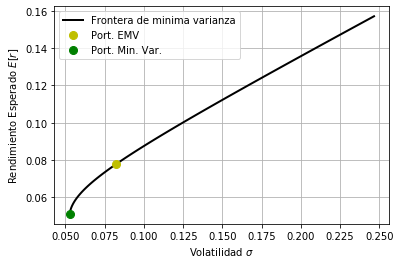

In [21]:
plt.figure(figsize=(6,4))
plt.plot(front_minvar['Vol'],front_minvar['Media'],lw=2,color='black',label='Frontera de minima varianza')
plt.plot(s_EMV,E_EMV,'oy',ms=8,label='Port. EMV')
plt.plot(s_minvar,E_minvar,'og',ms=8,label='Port. Min. Var.')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.legend()
plt.grid()

In [22]:
# Vector de wp variando entre 0 y 1.5 con n pasos
wp = np.linspace(0,1.5,50)

In [23]:
LAC = pd.DataFrame(index=range(len(wp)),
                   data = {'w_EMV':wp,
                           'w_minvar':1-wp,
                           'Media':wp*E_EMV+(1-wp)*E_minvar,
                           'Vol':np.sqrt((wp*s_EMV)**2+2*wp*(1-wp)*r_MV_EMV*s_EMV*s_minvar+((1-wp)*s_minvar)**2)})
LAC['RS'] = (LAC['Media']-rf)/LAC['Vol']
LAC

,w_EMV,w_minvar,Media,Vol,RS
0,0.000000,1.000000,0.051111,0.052674,0.400793
1,0.030612,0.969388,0.051923,0.052825,0.415002
2,0.061224,0.938776,0.052734,0.053039,0.428630
3,0.091837,0.908163,0.053545,0.053313,0.441641
4,0.122449,0.877551,0.054357,0.053648,0.454010
5,0.153061,0.846939,0.055168,0.054042,0.465716
6,0.183673,0.816327,0.055979,0.054493,0.476746
7,0.214286,0.785714,0.056791,0.055001,0.487096
8,0.244898,0.755102,0.057602,0.055564,0.496765
9,0.275510,0.724490,0.058414,0.056180,0.505762


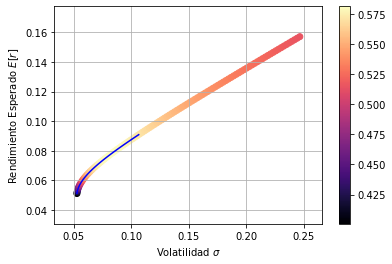

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(front_minvar['Vol'],front_minvar['Media'],c=front_minvar['RS'],cmap='magma')
plt.plot(LAC['Vol'],LAC['Media'],'-b')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.colorbar()
plt.grid()

## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

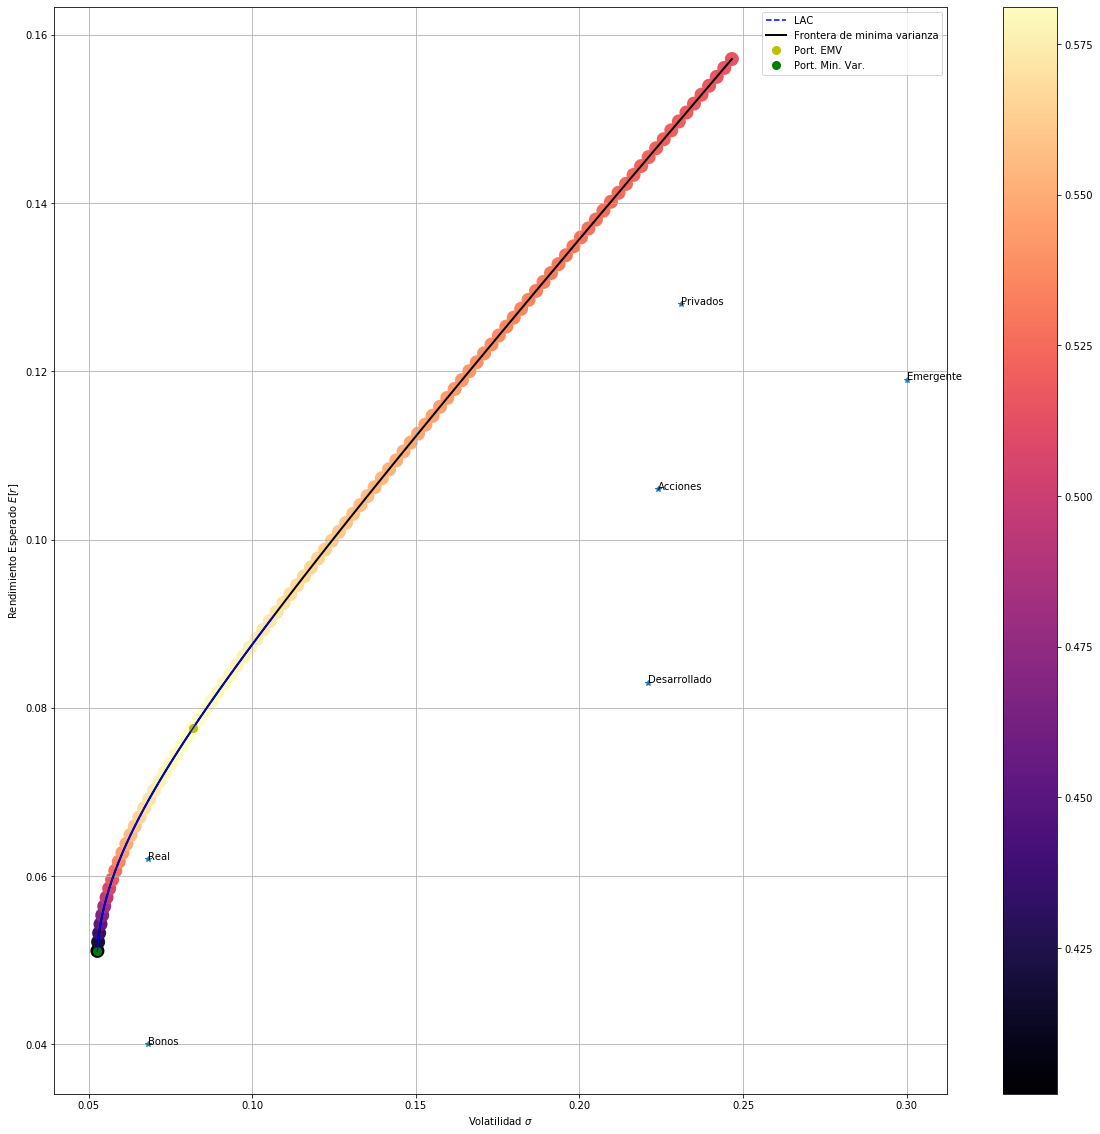

In [26]:
x_points =  annual_ret_summ.loc['Volatilidad']
y_points = annual_ret_summ.loc['Media']
plt.figure(figsize=(20,20))
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(annual_ret_summ.loc['Volatilidad','Bonos'],
         annual_ret_summ.loc['Media','Bonos'], 'Bonos')
plt.text(annual_ret_summ.loc['Volatilidad','Acciones'],
         annual_ret_summ.loc['Media','Acciones'], 'Acciones')
plt.text(annual_ret_summ.loc['Volatilidad','Desarrollado'],
         annual_ret_summ.loc['Media','Desarrollado'], 'Desarrollado')
plt.text(annual_ret_summ.loc['Volatilidad','Emergente'],
         annual_ret_summ.loc['Media','Emergente'], 'Emergente')
plt.text(annual_ret_summ.loc['Volatilidad','Privados'],
         annual_ret_summ.loc['Media','Privados'], 'Privados')
plt.text(annual_ret_summ.loc['Volatilidad','Real'],
         annual_ret_summ.loc['Media','Real'], 'Real')
plt.plot(LAC['Vol'],LAC['Media'],'--b', label='LAC')
plt.plot(front_minvar['Vol'],front_minvar['Media'],lw=2,color='black',label='Frontera de minima varianza')
plt.plot(s_EMV,E_EMV,'oy',ms=8,label='Port. EMV')
plt.plot(s_minvar,E_minvar,'og',ms=8,label='Port. Min. Var.')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.scatter(front_minvar['Vol'],front_minvar['Media'],lw=8,c=front_minvar['RS'],cmap='magma')
plt.plot(LAC['Vol'],LAC['Media'],'-b')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.colorbar()
plt.legend()
plt.grid()

In [28]:
gamma=7
w_opt = (E_EMV-rf)/(gamma*s_EMV**2)
w_opt

1.0134389348275532

In [29]:
w_EMVp= (w_opt*w_EMV)*100
w_EMVp = np.round(w_EMVp,2)
w_EMVp

array([ 0.  ,  0.  ,  0.  ,  8.3 , 16.81, 76.23])

Lo que nos indica la asignación es que tenemos que tomar una posición corta en el activo libre de riesgo (1.34%), invertir 8.3% en mercados emergentes, 16.81% fondos privados y 76.23% en activos reales.